# Tuning-In To NYC’s Most Musical Neighborhoods
##### by Michael Cascio

### Import Required Python Packages

In [182]:
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize

import folium
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

### Set Foursquare API Credentials

In [183]:
CLIENT_ID = 'TTTYSUWFUMJXP00B4DT3JJU0RB4GZ5C25DIEK3EJ2QBMHWK0' # your Foursquare ID
CLIENT_SECRET = 'XU5LCC4PNFPR0JBA41A45ZHHHTAVTTNX1VJUZINIY1X2SF0E' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Import NYC Neighborhood Name & Location Centroid Data Hosted From NYU's Spatial Data Repository

In [184]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
nyc_neighborhood_data = newyork_data['features']
nyc_neighborhood_data[2]

{'type': 'Feature',
 'id': 'nyu_2451_34572.3',
 'geometry': {'type': 'Point',
  'coordinates': [-73.82780644716412, 40.887555677350775]},
 'geometry_name': 'geom',
 'properties': {'name': 'Eastchester',
  'stacked': 1,
  'annoline1': 'Eastchester',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.82780644716412,
   40.887555677350775,
   -73.82780644716412,
   40.887555677350775]}}

In [185]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

nyc_neighborhoods = pd.DataFrame(columns=column_names)

for data in nyc_neighborhood_data:
    borough = nyc_neighborhood_data = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyc_neighborhoods = nyc_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
nyc_neighborhoods.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Retrieve Music-Related Venue Data From Foursquare

#### Foursquare Music-Related Venue CategoryIDs

Music Venue = '4bf58dd8d48988d1e5931735'

Jazz Club = '4bf58dd8d48988d1e7931735'

Piano Bar = '4bf58dd8d48988d1e8931735'

Rock Club = '4bf58dd8d48988d1e9931735'

Concert Hall = '5032792091d4c4b30a586d5c'

Amphitheater = '56aa371be4b08b9a8d5734db'

Music Festival = '5267e4d9e4b0ec79466e48d1'

Nightlife Spot = '4d4b7105d754a06376d81259'

Music Store = '4bf58dd8d48988d1fe941735'

Record Shop = '4bf58dd8d48988d10d951735'

Recording Studio = '52f2ab2ebcbc57f1066b8b37'

#### Function To Create API Url

In [186]:
def createURL(endpoint, CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, categoryId, limit):
    url = '{}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            endpoint,
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            categoryId,
            limit
        )
    return url

endpoint = 'https://api.foursquare.com/v2/venues/search?'
categoryIds = ['4bf58dd8d48988d1e5931735', '4bf58dd8d48988d1e7931735', '4bf58dd8d48988d1e8931735',
               '4bf58dd8d48988d1e9931735', '5032792091d4c4b30a586d5c', '56aa371be4b08b9a8d5734db',
               '5267e4d9e4b0ec79466e48d1', '4d4b7105d754a06376d81259', '4bf58dd8d48988d1fe941735',
               '4bf58dd8d48988d10d951735', '52f2ab2ebcbc57f1066b8b37',
              ]
categoryId = ','.join(categoryIds)
limit = 50

#### Function To Retrieve All Music-Related Venues Per Neighborhood
(Currently commented out because the data has already been retrieved and saved to a csv file)

In [187]:
'''
def getNearbyMusicVenues(neighborhoods, latitudes, longitudes, radius=1000):
    endpoint = 'https://api.foursquare.com/v2/venues/search?'
    venues_list = []   
    
    for hood_name, lat, lng in zip(neighborhoods, latitudes, longitudes):
    
        url = createURL(endpoint, CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, categoryId, limit)
        
        results = requests.get(url).json()['response']['venues']

        for item in results:
            venue_name = item['name']
            venue_category = item['categories'][0]['name']
            venue_lat = item['location']['lat']
            venue_lng = item['location']['lng']
            try:
                venue_city = item['location']['city']
            except:
                venue_city = 'N/A'
            venue_state = item['location']['state']
            
            venues_list.append([(hood_name,
                                lat,
                                lng,
                                venue_name,
                                venue_category,
                                venue_lat,
                                venue_lng,
                                venue_city,
                                venue_state
                               )])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude',
                             'Neighborhood Longitude',
                             'Venue Name',
                             'Venue Category',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue City',
                             'Venue State'
                            ]
    return nearby_venues

prelim_venue_data = getNearbyMusicVenues(nyc_neighborhoods['Neighborhood'],
                                         nyc_neighborhoods['Latitude'],
                                         nyc_neighborhoods['Longitude'],
                                         radius
                                        )

'''

"\ndef getNearbyMusicVenues(neighborhoods, latitudes, longitudes, radius=1000):\n    endpoint = 'https://api.foursquare.com/v2/venues/search?'\n    venues_list = []   \n    \n    for hood_name, lat, lng in zip(neighborhoods, latitudes, longitudes):\n    \n        url = createURL(endpoint, CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, categoryId, limit)\n        \n        results = requests.get(url).json()['response']['venues']\n\n        for item in results:\n            venue_name = item['name']\n            venue_category = item['categories'][0]['name']\n            venue_lat = item['location']['lat']\n            venue_lng = item['location']['lng']\n            try:\n                venue_city = item['location']['city']\n            except:\n                venue_city = 'N/A'\n            venue_state = item['location']['state']\n            \n            venues_list.append([(hood_name,\n                                lat,\n                                lng,\n              

#### How Many Venues Did We Retrieve?
(Currently commented out because the data has already been retrieved and saved to a csv file)

In [188]:
'''
print(prelim_venue_data.shape)
prelim_venue_data.head(5)
'''

'\nprint(prelim_venue_data.shape)\nprelim_venue_data.head(5)\n'

#### Save DataFrame As CSV To Avoid Further API Calls
(Currently commented out because the data has already been retrieved and saved to a csv file)

In [189]:
'''prelim_venue_data.to_csv(path_or_buf='prelim_venue_data.csv')'''

"prelim_venue_data.to_csv(path_or_buf='prelim_venue_data.csv')"

#### Loading the previously saved DataFrame from csv

In [190]:
prelim_venue_data = pd.read_csv('prelim_venue_data.csv', index_col=0)
prelim_venue_data.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State
0,Wakefield,40.894705,-73.847201,Major League Music Group,Music Venue,40.891367,-73.850088,NaN,New York
1,Wakefield,40.894705,-73.847201,Dyme Life Radio,Music Venue,40.894541,-73.843266,Bronx,NY
2,Wakefield,40.894705,-73.847201,Par-City,Music Venue,40.890211,-73.847002,Bronx,NY
3,Wakefield,40.894705,-73.847201,The Upper Room,Music Venue,40.892567,-73.846406,NaN,New York
4,Wakefield,40.894705,-73.847201,Tavern,Bar,40.895898,-73.855731,Bronx,NY


### Exploratory Data Analysis

#### What states are the venues in?

In [191]:
prelim_venue_data.groupby('Venue State')['Venue State'].count()

Venue State
CA             1
MA             4
NJ            15
NY          8786
New York     636
Name: Venue State, dtype: int64

#### What venue categories are the entries in?

In [192]:
n_unique = len(prelim_venue_data['Venue Category'].unique())
print(f'There are {n_unique} unique venue categories in this dataframe')
prelim_venue_data.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 149 unique venue categories in this dataframe


Venue Category
Bar                                         2124
Lounge                                       901
Cocktail Bar                                 492
Music Venue                                  477
Nightclub                                    474
Other Nightlife                              469
Pub                                          365
Wine Bar                                     277
Sports Bar                                   276
Hookah Bar                                   255
Beer Garden                                  218
Dive Bar                                     214
Karaoke Bar                                  178
American Restaurant                          169
Concert Hall                                 142
Speakeasy                                    131
Nightlife Spot                               120
Brewery                                      119
Record Shop                                  119
Rock Club                                    114
Music

#### How many venues did not have their 'city' parameter filled-out?

In [193]:
n_unknown_cities = prelim_venue_data[prelim_venue_data['Venue City']=='N/A']['Venue Name'].count()
print(f'There were {n_unknown_cities} entries in the dataset without the "city" parameter filled-out')

There were 0 entries in the dataset without the "city" parameter filled-out


In [194]:
prelim_venue_data[prelim_venue_data['Venue City']=='N/A']['Venue Name'][0:5]

Series([], Name: Venue Name, dtype: object)

#### Are there any 'null' values in the dataset?

In [195]:
prelim_venue_data.isnull().values.any()

True

#### How many unique venues are there?

In [196]:
n_unique_venues = len(prelim_venue_data['Venue Name'].unique())
print(f'There are {n_unique_venues} unique venues in the preliminary dataset')

There are 5039 unique venues in the preliminary dataset


### Data Pre-Processing

#### Remove entries with "Venue State" not equal to "New York" or "NY"

In [197]:
ny_venue_data = prelim_venue_data[(prelim_venue_data['Venue State'] == "New York") | (prelim_venue_data['Venue State'] == "NY")]
ny_venue_data['Venue State'].replace(to_replace="New York", value="NY", inplace=True)
delta = prelim_venue_data.shape[0] - ny_venue_data.shape[0]
print(f'{delta} entries were removed from the preliminary dataset based on "Venue State"')
ny_venue_data.head(5)

20 entries were removed from the preliminary dataset based on "Venue State"


/Users/michaelcascio/.pyenv/versions/3.7.2/envs/data-tools/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State
0,Wakefield,40.894705,-73.847201,Major League Music Group,Music Venue,40.891367,-73.850088,NaN,NY
1,Wakefield,40.894705,-73.847201,Dyme Life Radio,Music Venue,40.894541,-73.843266,Bronx,NY
2,Wakefield,40.894705,-73.847201,Par-City,Music Venue,40.890211,-73.847002,Bronx,NY
3,Wakefield,40.894705,-73.847201,The Upper Room,Music Venue,40.892567,-73.846406,NaN,NY
4,Wakefield,40.894705,-73.847201,Tavern,Bar,40.895898,-73.855731,Bronx,NY


#### Remove entries with "Venue City" equal to "N/A"

In [198]:
ny_venue_data_with_city = ny_venue_data[(ny_venue_data['Venue City'] != "N/A")]
delta = ny_venue_data.shape[0] - ny_venue_data_with_city.shape[0]
print(f'{delta} entries were removed based on "Venue City"')
ny_venue_data_with_city.head(5)

0 entries were removed based on "Venue City"


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State
0,Wakefield,40.894705,-73.847201,Major League Music Group,Music Venue,40.891367,-73.850088,NaN,NY
1,Wakefield,40.894705,-73.847201,Dyme Life Radio,Music Venue,40.894541,-73.843266,Bronx,NY
2,Wakefield,40.894705,-73.847201,Par-City,Music Venue,40.890211,-73.847002,Bronx,NY
3,Wakefield,40.894705,-73.847201,The Upper Room,Music Venue,40.892567,-73.846406,NaN,NY
4,Wakefield,40.894705,-73.847201,Tavern,Bar,40.895898,-73.855731,Bronx,NY


#### Remove entries that are not associated with music-related categories

In [199]:
music_related_categories = ['Music Venue', 'Lounge', 'Nightclub', 'Jazz Club', 'Recording Studio', 'Piano Bar',
                            'Record Shop', 'Concert Hall', 'Karaoke Bar', 'Music Store', 'Rock Club', 'Amphitheater',
                            'Music Festival', 'Opera House', 'Music School']
ny_music_venues = ny_venue_data_with_city[ny_venue_data_with_city['Venue Category'].isin(music_related_categories)]
delta = ny_venue_data_with_city.shape[0] - ny_music_venues.shape[0]
print(f'{delta} entries were removed based on "Venue Category" not being related to music')
print(ny_music_venues['Venue Category'].unique())
ny_music_venues.head(5)

6750 entries were removed based on "Venue Category" not being related to music
['Music Venue' 'Lounge' 'Nightclub' 'Jazz Club' 'Recording Studio'
 'Piano Bar' 'Record Shop' 'Concert Hall' 'Karaoke Bar' 'Music Store'
 'Rock Club' 'Amphitheater' 'Music Festival' 'Opera House' 'Music School']


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State
0,Wakefield,40.894705,-73.847201,Major League Music Group,Music Venue,40.891367,-73.850088,NaN,NY
1,Wakefield,40.894705,-73.847201,Dyme Life Radio,Music Venue,40.894541,-73.843266,Bronx,NY
2,Wakefield,40.894705,-73.847201,Par-City,Music Venue,40.890211,-73.847002,Bronx,NY
3,Wakefield,40.894705,-73.847201,The Upper Room,Music Venue,40.892567,-73.846406,NaN,NY
12,Wakefield,40.894705,-73.847201,Emma C. Brisbane Youth Leadership Center,Lounge,40.887923,-73.853688,Bronx,NY


#### How many music venue entries are left?

In [200]:
n_entries = ny_music_venues.shape[0]
print(f'There are {n_entries} entries in the ny_music_venues dataframe')

There are 2672 entries in the ny_music_venues dataframe


#### How many unique music venues are left?

In [201]:
n_unique_entries = len(ny_music_venues['Venue Name'].unique())
print(f'There are {n_unique_entries} unique entries in the ny_music_venues dataframe')

There are 1463 unique entries in the ny_music_venues dataframe


#### One-Hot-Encode Venue Categories

In [202]:
ny_venue_category_onehot = pd.get_dummies(ny_music_venues[['Venue Category']], prefix="", prefix_sep="")

ny_venue_category_onehot['Neighborhood'] = ny_music_venues['Neighborhood'] 

fixed_columns = [ny_venue_category_onehot.columns[-1]] + list(ny_venue_category_onehot.columns[:-1])
ny_venue_category_onehot = ny_venue_category_onehot[fixed_columns]

print(ny_venue_category_onehot.shape)
ny_venue_category_onehot.head(10)

(2672, 16)


,Neighborhood,Amphitheater,Concert Hall,Jazz Club,Karaoke Bar,Lounge,Music Festival,Music School,Music Store,Music Venue,Nightclub,Opera House,Piano Bar,Record Shop,Recording Studio,Rock Club
0,Wakefield,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12,Wakefield,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
13,Wakefield,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14,Wakefield,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
18,Wakefield,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21,Wakefield,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22,Wakefield,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Determine the total amount of venues of each category in each neighborhood

In [203]:
venue_counts = ny_venue_category_onehot.groupby('Neighborhood').sum()
venue_counts.head(10)

,Amphitheater,Concert Hall,Jazz Club,Karaoke Bar,Lounge,Music Festival,Music School,Music Store,Music Venue,Nightclub,Opera House,Piano Bar,Record Shop,Recording Studio,Rock Club
Neighborhood,,,,,,,,,,,,,,,
Allerton,0,0,0,0,3,0,0,0,3,3,0,0,0,0,0
Arden Heights,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Arlington,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Arrochar,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
Astoria,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
Astoria Heights,0,0,0,1,3,0,0,0,1,2,0,0,0,0,0
Auburndale,0,0,0,3,3,0,0,0,2,1,0,0,0,0,1
Bath Beach,0,0,0,1,9,0,0,1,1,1,0,0,0,0,1
Bay Ridge,0,0,0,2,1,0,0,1,1,0,0,0,0,0,0


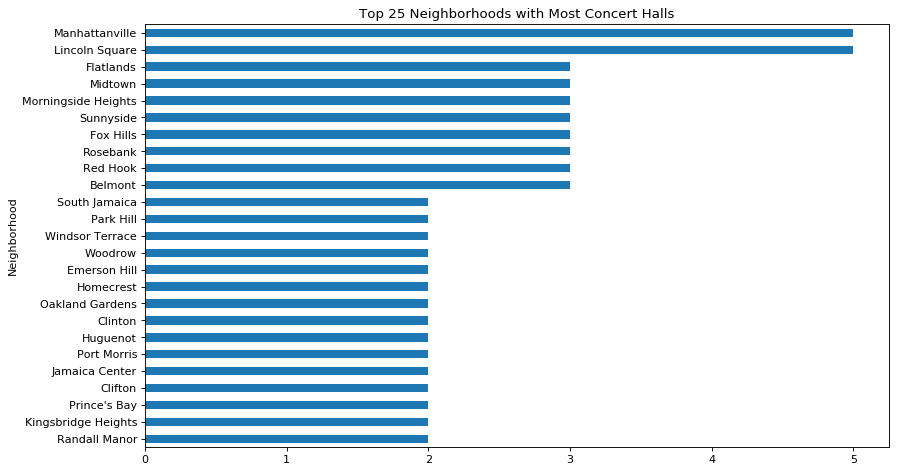

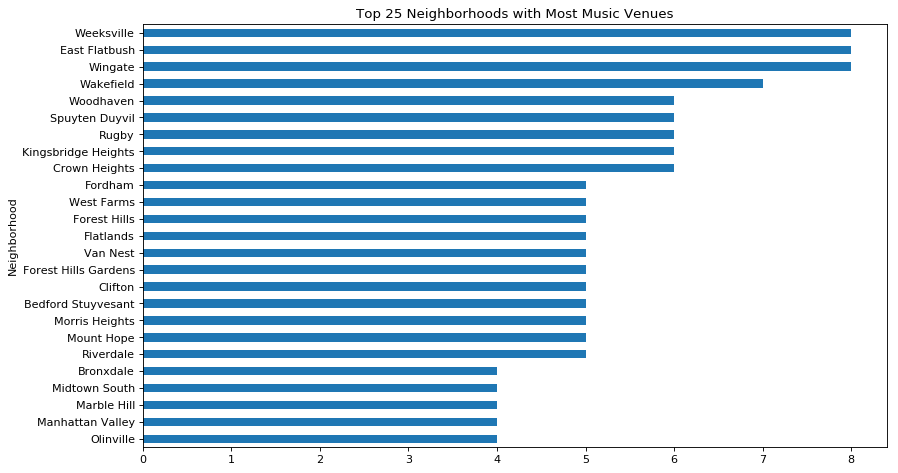

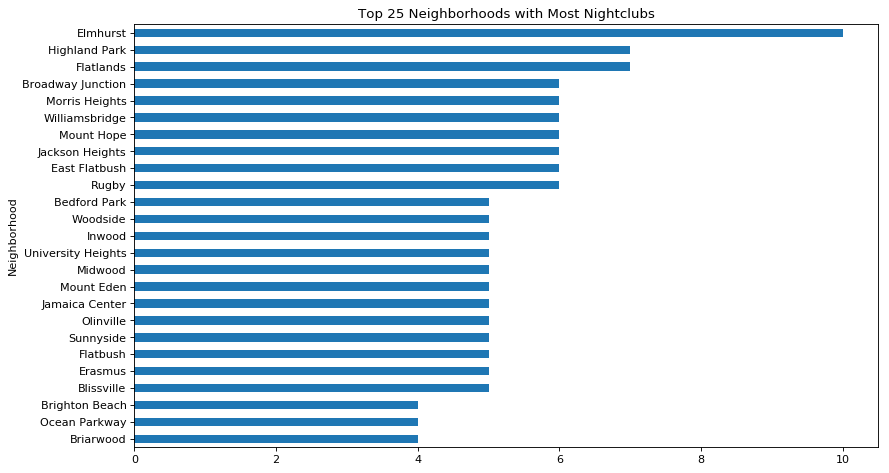

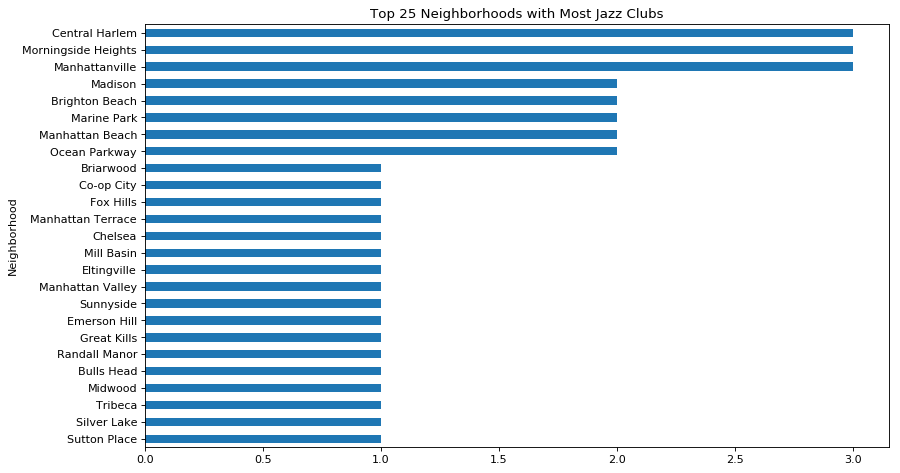

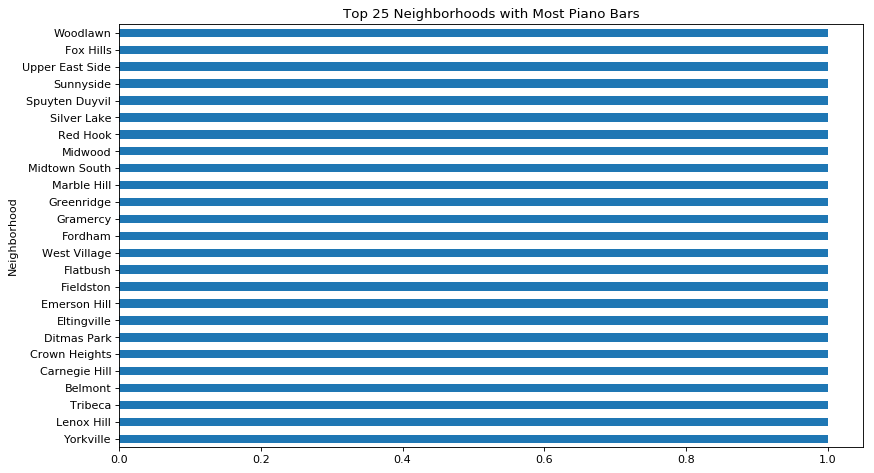

In [214]:
plot_categories = ['Concert Hall', 'Music Venue', 'Nightclub', 'Jazz Club', 'Piano Bar']
n = 25
for category in plot_categories:
    plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
    plt.title(f'Top {n} Neighborhoods with Most {category}s')
    top_category_neighborhoods = venue_counts[category].sort_values(ascending=False)[0:n]
    top_category_neighborhoods = top_category_neighborhoods.sort_values(ascending=True)
    top_category_neighborhoods.plot.barh(y=category, rot=0)

#### Determine the total amount of venues of each category

In [36]:
venue_totals = {}
for category in music_related_categories:
    venue_totals[category] = venue_counts[category].sum()

venue_totals

{'Music Venue': 475,
 'Lounge': 900,
 'Nightclub': 473,
 'Jazz Club': 49,
 'Recording Studio': 79,
 'Piano Bar': 25,
 'Record Shop': 119,
 'Concert Hall': 142,
 'Karaoke Bar': 178,
 'Music Store': 108,
 'Rock Club': 114,
 'Amphitheater': 3,
 'Music Festival': 1,
 'Opera House': 1,
 'Music School': 5}

#### For each venue category, determine the percentage of entities in each neighborhood

In [66]:
venue_mean = pd.DataFrame()
for category, total in venue_totals.items():
    venue_mean[category] = venue_counts[category].apply(lambda x: x / total)
venue_mean = venue_mean.reindex(sorted(venue_mean.columns), axis=1).reset_index()
venue_mean.head(5)

,Neighborhood,Amphitheater,Concert Hall,Jazz Club,Karaoke Bar,Lounge,Music Festival,Music School,Music Store,Music Venue,Nightclub,Opera House,Piano Bar,Record Shop,Recording Studio,Rock Club
0,Allerton,0.0,0.000000,0.0,0.000000,0.003333,0.0,0.0,0.0,0.006316,0.006342,0.0,0.0,0.000000,0.0,0.0
1,Arden Heights,0.0,0.007042,0.0,0.000000,0.001111,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,Arlington,0.0,0.000000,0.0,0.000000,0.001111,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,Arrochar,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.002114,0.0,0.0,0.008403,0.0,0.0
4,Astoria,0.0,0.000000,0.0,0.005618,0.001111,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


#### Creating a dataframe that shows the top 5 venue categories each neighborhood is known for

In [67]:
def return_top_venue_categories(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [109]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Top Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Top Venue Category'.format(ind+1))

neighborhoods_top_venue_categories = pd.DataFrame(columns=columns)
neighborhoods_top_venue_categories['Neighborhood'] = venue_mean['Neighborhood']

for ind in np.arange(venue_mean.shape[0]):
    neighborhoods_top_venue_categories.iloc[ind, 1:] = return_top_venue_categories(venue_mean.iloc[ind, :], num_top_venues)

neighborhoods_top_venue_categories.head(5)

,Neighborhood,1st Top Venue Category,2nd Top Venue Category,3rd Top Venue Category,4th Top Venue Category,5th Top Venue Category
0,Allerton,Nightclub,Music Venue,Lounge,Rock Club,Recording Studio
1,Arden Heights,Concert Hall,Lounge,Rock Club,Recording Studio,Record Shop
2,Arlington,Lounge,Rock Club,Recording Studio,Record Shop,Piano Bar
3,Arrochar,Record Shop,Nightclub,Rock Club,Recording Studio,Piano Bar
4,Astoria,Karaoke Bar,Lounge,Rock Club,Recording Studio,Record Shop


### Create a KMeans Model To Cluster Neighborhoods

In [110]:
kclusters = 15

venue_grouped_clustering = venue_mean.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venue_grouped_clustering)

kmeans.labels_

array([ 7,  7,  7,  7,  7,  7,  7,  4,  7,  4,  7,  7,  7,  7,  4,  4,  4,
        7,  4,  0, 13, 11,  7,  4,  7, 10,  9, 11,  4,  7,  7,  4,  9,  7,
        7,  7,  4,  0,  7,  7,  7, 12,  7,  9, 13,  7, 10,  7,  7,  7,  4,
        7,  7,  9,  7,  7,  7,  4,  4,  1, 11,  9,  0,  4,  0,  7,  7,  7,
       11,  4,  7,  4, 10,  4,  7, 13,  7, 11,  7,  7,  7,  7, 10,  4, 14,
       14,  4,  7,  0,  7,  0,  7,  4, 13,  8,  0,  7,  4,  7,  4, 14,  4,
        7,  7,  7,  7,  7,  7,  0,  7,  7,  7, 10,  9,  7,  0,  9, 13,  4,
        7, 10,  4,  4,  7,  7,  7, 10,  7,  7,  7,  5,  7,  7,  4,  4,  7,
        9, 10,  4,  9,  7,  7,  7, 11,  0,  7,  2,  7, 13,  7,  5,  4, 13,
        6,  4,  9,  6,  9, 12,  7,  0,  6,  7,  7,  4,  7,  7,  7,  0, 14,
        9,  7, 12,  4, 11,  4,  7,  4,  4,  8,  7,  4,  4,  7,  4, 10, 13,
        7,  7,  7,  7,  7,  7, 11,  6,  4, 10,  7,  7,  7, 10,  4,  7,  7,
        7,  4,  7,  7,  7,  7,  3, 10,  7,  7,  5,  9,  7,  0, 11,  4,  7,
        7,  7,  7,  7,  7

#### Creating a new dataframe merging neighborhood location data, top venue category by neighborhood, and cluster labels

In [111]:
neighborhoods_top_venue_categories.insert(1,'Cluster Labels', kmeans.labels_)

ny_neighborhood_music_profile = nyc_neighborhoods.drop(columns=['Borough'])

ny_neighborhood_music_profile = ny_neighborhood_music_profile.join(neighborhoods_top_venue_categories.set_index('Neighborhood'), on='Neighborhood').dropna(axis=0)

ny_neighborhood_music_profile.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Top Venue Category,2nd Top Venue Category,3rd Top Venue Category,4th Top Venue Category,5th Top Venue Category
0,Wakefield,40.894705,-73.847201,7.0,Music Venue,Nightclub,Lounge,Rock Club,Recording Studio
1,Co-op City,40.874294,-73.829939,9.0,Jazz Club,Recording Studio,Nightclub,Music Venue,Rock Club
2,Eastchester,40.887556,-73.827806,11.0,Recording Studio,Jazz Club,Nightclub,Music Venue,Rock Club
3,Fieldston,40.895437,-73.905643,0.0,Piano Bar,Music Venue,Record Shop,Lounge,Nightclub
4,Riverdale,40.890834,-73.912585,7.0,Music Venue,Nightclub,Lounge,Rock Club,Recording Studio


#### Creating A Visualization of The Clusters

In [112]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors
latitude = 40.730610
longitude = -73.935242
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.45)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_neighborhood_music_profile['Latitude'], ny_neighborhood_music_profile['Longitude'], ny_neighborhood_music_profile['Neighborhood'], ny_neighborhood_music_profile['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examining Clusters

In [59]:
for cluster in range(0, kclusters):
    print(f'Cluster {cluster}:')
    print(ny_neighborhood_music_profile.loc[ny_neighborhood_music_profile['Cluster Labels'] == cluster, ny_neighborhood_music_profile.columns[[0] + list(range(4, ny_neighborhood_music_profile.shape[1]))]], end="\n\n\n")

Cluster 0:
        Neighborhood 1st Top Venue Category 2nd Top Venue Category  \
3          Fieldston              Piano Bar            Music Venue   
6        Marble Hill              Piano Bar            Music Venue   
7           Woodlawn              Piano Bar            Music Venue   
16           Fordham              Piano Bar            Music Venue   
34           Belmont              Piano Bar           Concert Hall   
35    Spuyten Duyvil              Piano Bar            Music Venue   
54          Flatbush              Piano Bar                 Lounge   
55     Crown Heights              Piano Bar       Recording Studio   
67          Red Hook              Piano Bar           Concert Hall   
107  Upper East Side              Piano Bar              Rock Club   
108        Yorkville              Piano Bar              Rock Club   
109       Lenox Hill              Piano Bar              Rock Club   
126         Gramercy              Piano Bar            Music Venue   
221      